Let's consider a baseline model with the following primitives 

* Market prior $\lambda = 0.5$
* Market confidence threshold $\lambda$_bar = 0.8
* Market reward $R = 1$ 
* High-type outside offer distribution $F_H =$ Uniform[0.25, 1.]
* Low-type distribution $F_L =$ Uniform[0., 0.75]

In [23]:
# Dependencies
using Pkg 
pkg"activate .."
using LinearAlgebra, Statistics
using Distributions, Plots

┌ Info: Precompiling Distributions [31c24e10-a181-5473-b8eb-7969acd0382f]
└ @ Base loading.jl:1186
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1186


In [24]:
# Primitives 
λ = 0.5
λ_bar = 0.8
R = 1.
F_H = Uniform(0.25, 1.)
F_L = Uniform(0., 0.75)

Uniform{Float64}(a=0.0, b=0.75)

In [25]:
# Write the τ function 
τ = (λ, λ_bar) -> λ*(1-λ_bar)/(λ_bar*(1-λ))

#9 (generic function with 1 method)

We can study this object over the parameter set 

┌ Info: Precompiling LaTeXStrings [b964fa9f-0449-5b57-a5c2-d3ea65f4040f]
└ @ Base loading.jl:1186


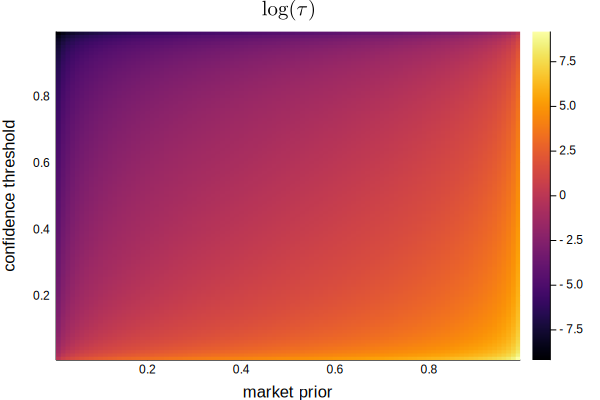

In [26]:
using LaTeXStrings
heatmap(0.01:0.01:0.99, 0.01:0.01:0.99, (λ, λ_bar) -> log(τ(λ, λ_bar)), title = L"\log(\tau)", xlabel = "market prior", ylabel = "confidence threshold")

And we can look at the function for slack in the constraints

In [27]:
slack(ϕ, p; λ = 0.5, λ_bar = 0.8) = cdf(F_L, ϕ*R - p) ≈ 0. ? 10e1 : abs(cdf(F_H, R - p)/cdf(F_L, ϕ*R - p) - ϕ/τ(λ, λ_bar)) # only need to run this once

slack (generic function with 1 method)

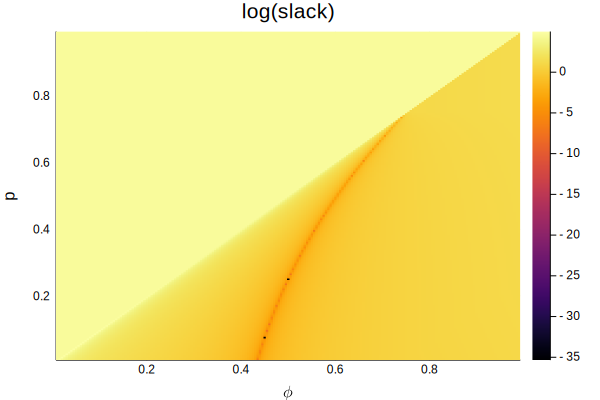

In [28]:
heatmap(0.01:0.005:0.99, 0.01:0.005:0.99, (ϕ, p) -> log(slack(ϕ, p)), title = "log(slack)", xlabel = L"\phi", ylabel = "p")

We can try varying the distributions of outside offers

In [29]:
F_H = TruncatedNormal(0.75, 2., 0., 1.)
F_L = TruncatedNormal(0.3, 2., 0., 1.)

Truncated(Normal{Float64}(μ=0.3, σ=2.0), range=(0.0, 1.0))

┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1186


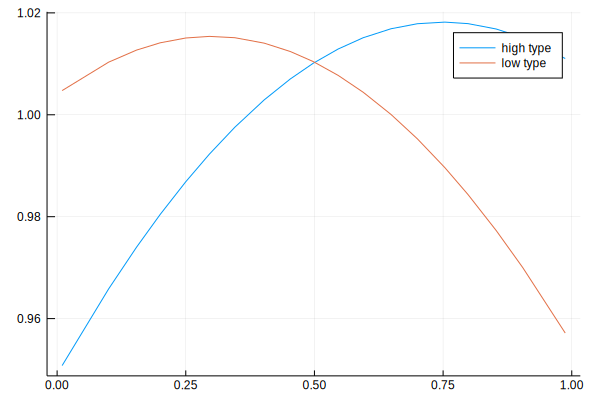

In [30]:
# Offer distributions
using StatsPlots
plot(F_H, label = "high type") # high dist
plot!(F_L, label = "low type") # low dist

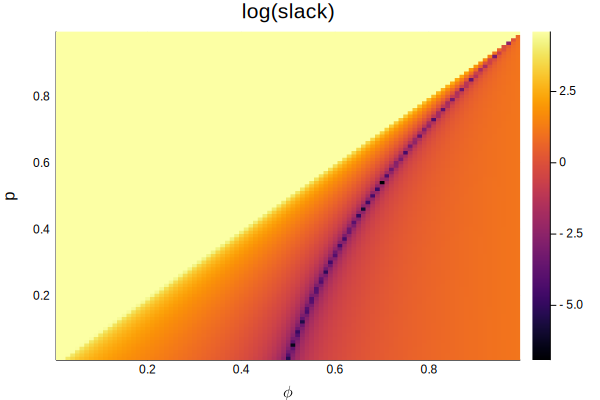

In [31]:
heatmap(0.01:0.01:0.99, 0.01:0.01:0.99, (ϕ, p) -> log(slack(ϕ, p)), title = "log(slack)", xlabel = L"\phi", ylabel = "p")

And the market parameters

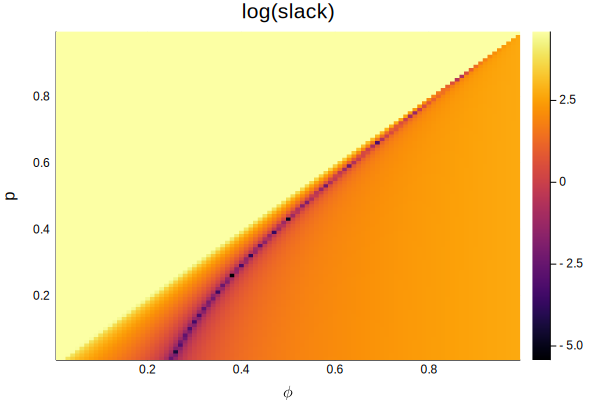

In [32]:
heatmap(0.01:0.01:0.99, 0.01:0.01:0.99, (ϕ, p) -> log(slack(ϕ, p; λ = 0.2)), title = "log(slack)", xlabel = L"\phi", ylabel = "p")

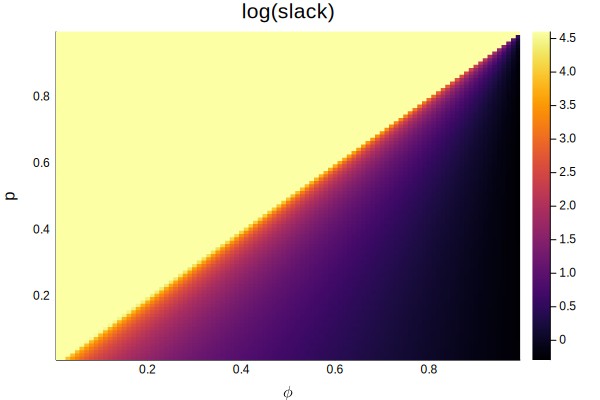

In [33]:
heatmap(0.01:0.01:0.99, 0.01:0.01:0.99, (ϕ, p) -> log(slack(ϕ, p; λ_bar = 0.2)), title = "log(slack)", xlabel = L"\phi", ylabel = "p")